In [38]:
from infer import load_model
from metrics import compute_metrics
from shared import (
    ACCURACY, PRECISION, RECALL, F1_SCORE, IOU,
    VALIDATION, TEST, TRAIN,
    DEVICE, DISTILLATION
)
import pandas as pd
from pathlib import Path
%load_ext autoreload
%autoreload 2
device = DEVICE
from evaluate import evaluate_model, evaluate_test_mode, visualize_performance_per_well, get_global_metrics_str, compare_performance_per_well

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
exp_list = [53, 1004]
checkpoint = 'best_model'

In [3]:
results_dict = {}
for exp in exp_list:
    model, dl_dict, model_config = load_model(exp, batch_size=16, model_name=checkpoint+".pt")
    metrics_validation, detailed_metrics_validation = evaluate_model(model, dl_dict, phase=VALIDATION, detailed_metrics_flag=True)
    metrics_train, detailed_metrics_train =evaluate_model(model, dl_dict, phase=TRAIN, detailed_metrics_flag=True)
    df_train = pd.DataFrame(detailed_metrics_train)
    df_validation = pd.DataFrame(detailed_metrics_validation)
    model_name = model_config['model']['name'] + ' - ' + str(exp) + " " + checkpoint
    results_dict[exp] = (metrics_validation, detailed_metrics_validation, metrics_train, detailed_metrics_train, model_config, df_train, df_validation, model_name)

TOTAL ELEMENTS 7737
TOTAL ELEMENTS 1935
TOTAL ELEMENTS 2538


100%|██████████| 121/121 [00:29<00:00,  4.11it/s]


Metrics on validation set
{'accuracy': 0.9747447371482849, 'precision': 0.7753747701644897, 'recall': 0.9004101157188416, 'dice': 0.7825585603713989, 'iou': 0.7083650231361389}


100%|██████████| 484/484 [01:37<00:00,  4.99it/s]


Metrics on train set
{'accuracy': 0.9785500764846802, 'precision': 0.8026665449142456, 'recall': 0.9166544675827026, 'dice': 0.8157516121864319, 'iou': 0.744350254535675}
TOTAL ELEMENTS 7737
TOTAL ELEMENTS 1935
TOTAL ELEMENTS 2538


100%|██████████| 121/121 [00:07<00:00, 15.42it/s]


Metrics on validation set
{'accuracy': 0.9750799536705017, 'precision': 0.8122709393501282, 'recall': 0.8545907139778137, 'dice': 0.7893723845481873, 'iou': 0.7154967784881592}


100%|██████████| 484/484 [00:36<00:00, 13.27it/s]

Metrics on train set
{'accuracy': 0.9769202470779419, 'precision': 0.8295949697494507, 'recall': 0.8614419102668762, 'dice': 0.8057383894920349, 'iou': 0.7301884889602661}


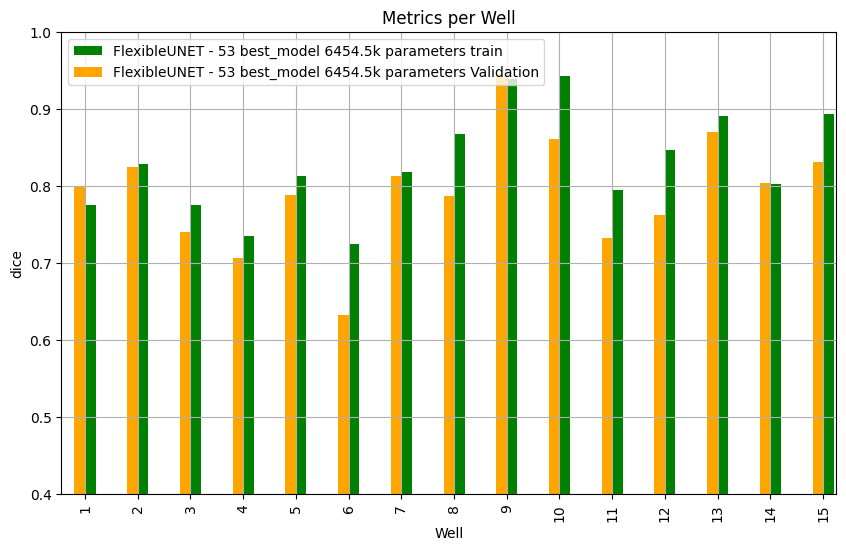

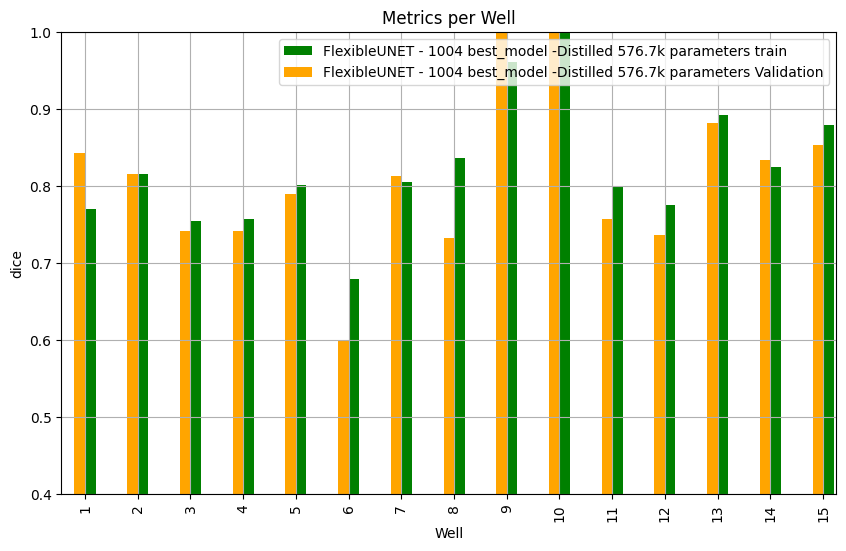

In [43]:
for exp in exp_list:
    list_df_plot = []
    label_list = []
    metrics_validation, detailed_metrics_validation, metrics_train, detailed_metrics_train, model_config, df_train, df_validation, model_name = results_dict[exp]
    list_df_plot.append(df_train)
    label_list.append(model_name + (' -Distilled' if model_config.get(DISTILLATION, False) else "") + f' {model_config["model"]["n_params"]/1000:.1f}k parameters'+ " train")
    list_df_plot.append(df_validation)
    label_list.append(model_name + (' -Distilled' if model_config.get(DISTILLATION, False) else "") + f' {model_config["model"]["n_params"]/1000:.1f}k parameters'+ " Validation")
    compare_performance_per_well(list_df_plot, label_list=label_list)

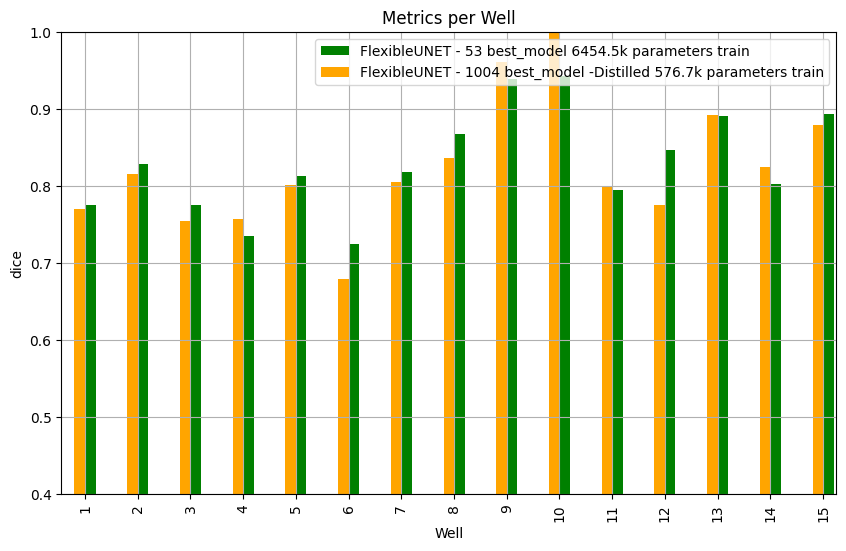

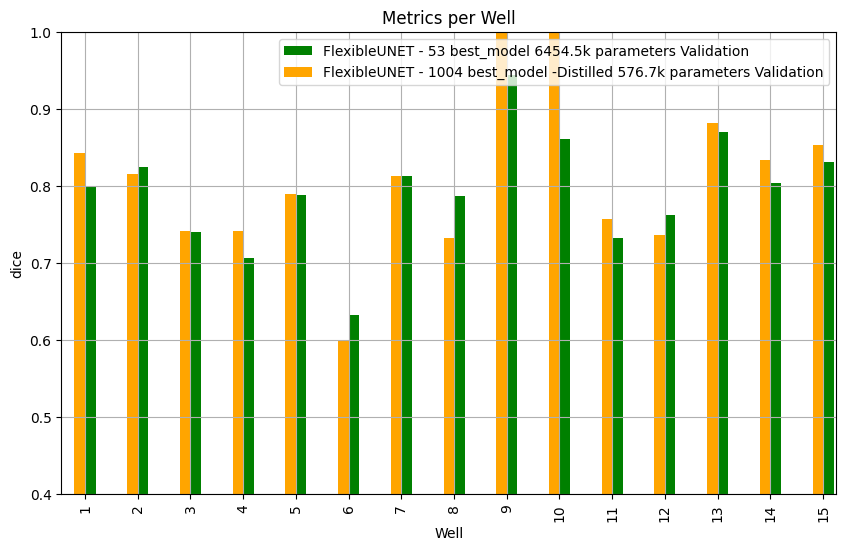

In [44]:
list_df_plot = []
label_list = []
for exp in exp_list:
    metrics_validation, detailed_metrics_validation, metrics_train, detailed_metrics_train, model_config, df_train, df_validation, model_name = results_dict[exp]
    list_df_plot.append(df_train)
    label_list.append(model_name + (' -Distilled' if model_config.get(DISTILLATION, False) else "") + f' {model_config["model"]["n_params"]/1000:.1f}k parameters'+ " train")
compare_performance_per_well(list_df_plot, label_list=label_list)

list_df_plot = []
label_list = []
for exp in exp_list:
    metrics_validation, detailed_metrics_validation, metrics_train, detailed_metrics_train, model_config, df_train, df_validation, model_name = results_dict[exp]
    list_df_plot.append(df_validation)
    label_list.append(model_name + (' -Distilled' if model_config.get(DISTILLATION, False) else "") + f' {model_config["model"]["n_params"]/1000:.1f}k parameters'+ " Validation")
compare_performance_per_well(list_df_plot, label_list=label_list)

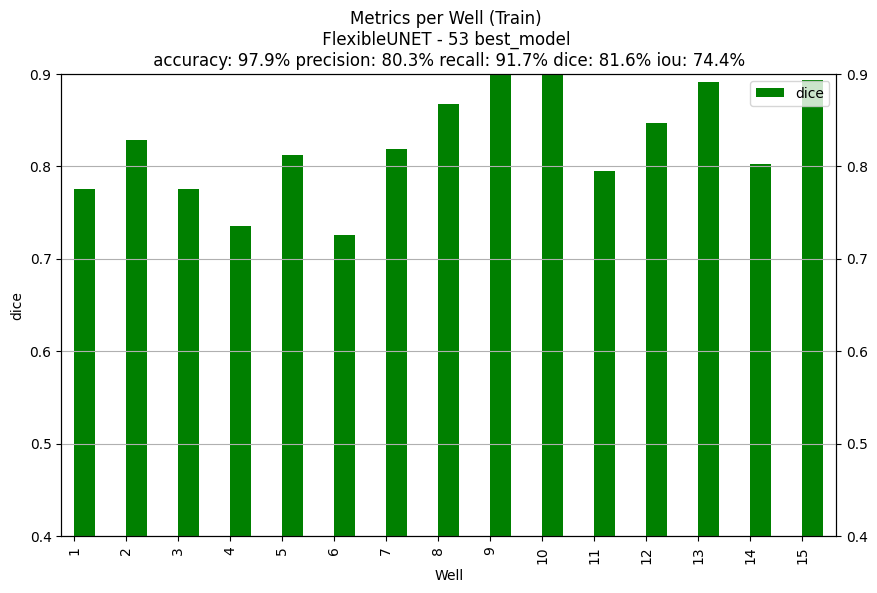

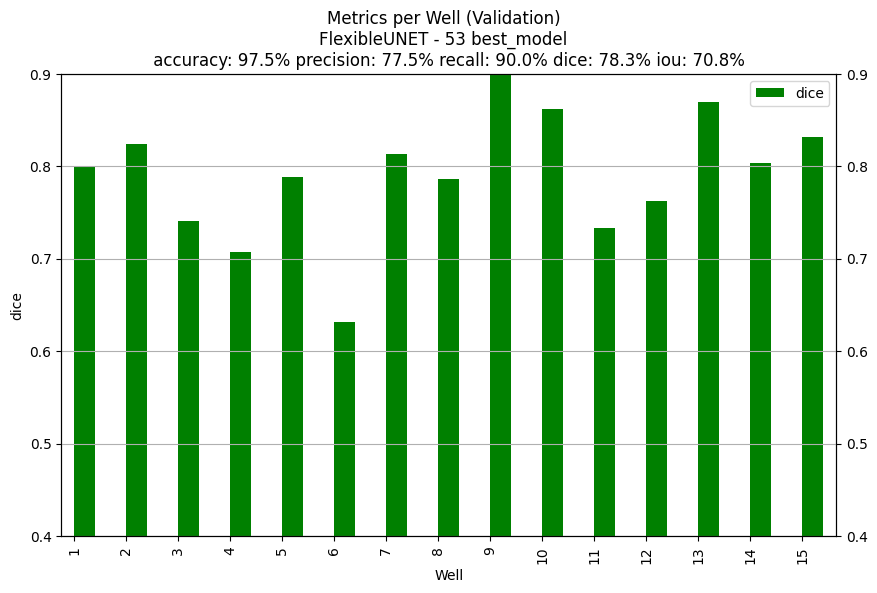

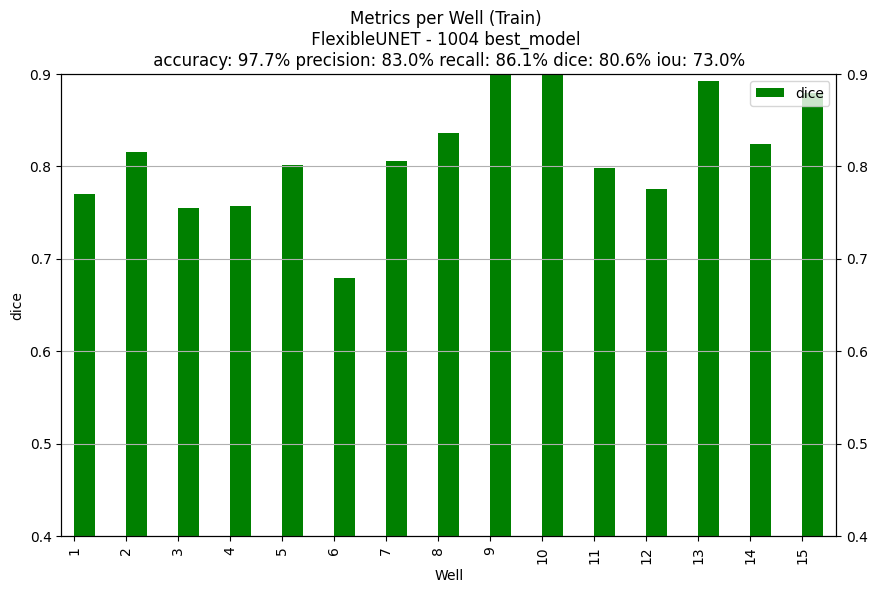

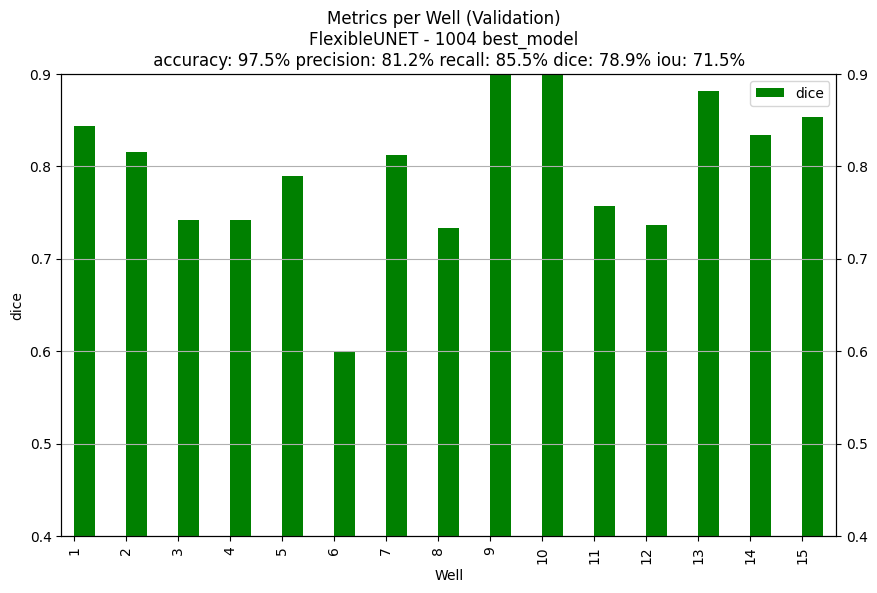

In [5]:
chosen_metrics=[F1_SCORE,]
# chosen_metrics = [PRECISION, RECALL]
for exp in exp_list:
    metrics_validation, detailed_metrics_validation, metrics_train, detailed_metrics_train, model_config, df_train, df_validation, model_name = results_dict[exp]
    visualize_performance_per_well(df_train, chosen_metrics=chosen_metrics, title=f'Metrics per Well (Train) \n {model_name}  \n {get_global_metrics_str(metrics_train)}')
    visualize_performance_per_well(df_validation, chosen_metrics=chosen_metrics, title=f'Metrics per Well (Validation)  \n{model_name}  \n {get_global_metrics_str(metrics_validation)}')
### -> Test 1 3 4 5


In [ ]:
# Export submission for test set https://challengedata.ens.fr/participants/challenges/144/
for exp in exp_list:
    model, dl_dict, model_config = load_model(exp, batch_size=16, model_name=checkpoint+".pt")
    labeled_dict = evaluate_test_mode(model, dl_dict, save_path=Path(f'__submission_{exp:04d}_dataset_update.csv'))